# Get the Rating Matrix

In [1]:
import pickle 

pickle_in = open("../datasets/rating_matrix.pickle","rb")
rating_matrix = pickle.load(pickle_in) 
pickle_in.close() 

In [2]:
type(rating_matrix)

dict

In [3]:
# !pip install apyori

In [4]:
# !pip install mlxtend  

In [5]:
# !pip install efficient-apriori

In [6]:
import pandas as pd 

data = pd.Series(rating_matrix).reset_index() 
data.columns = ["option_x", "option_y", "rating"] 

data.head() 

,option_x,option_y,rating
0,745321,666652,1
1,745321,751782,1
2,745321,751839,10
3,666652,751782,1
4,666652,751839,1


In [7]:
data_with_3 = pd.read_csv("../datasets/ratings_with_3_combinations.csv")[["rating", "bill"]]

data_with_3.head()

,rating,bill
0,1,"(745321, 666652)"
1,1,"(745321, 751782)"
2,10,"(745321, 751839)"
3,1,"(666652, 751782)"
4,1,"(666652, 751839)"


In [8]:
data_3_greater_1 = data_with_3[data_with_3.rating > 1] 

data_3_greater_1.head() 

,rating,bill
2,10,"(745321, 751839)"
5,151,"(751782, 751839)"
10,107,"(751873, 760125)"
11,12,"(772494, 754574)"
13,11,"(772494, 749358)"


In [9]:
len(data_with_3), len(data)

(5216080, 771062)

In [10]:
data.describe()

,option_x,option_y,rating
count,771062.000000,771062.000000,771062.000000
mean,735325.372226,735395.857417,2.418680
std,42364.768430,42085.392109,9.794105
min,16329.000000,10494.000000,1.000000
25%,714744.000000,714645.000000,1.000000
50%,751526.000000,751358.000000,1.000000
75%,760344.000000,760209.000000,2.000000
max,823758.000000,823758.000000,2254.000000


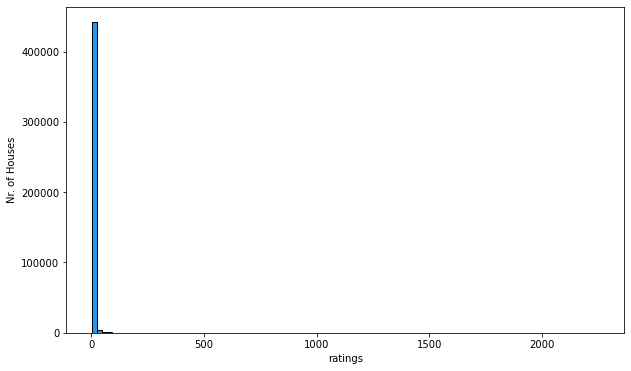

In [11]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

In [12]:
max(data_3_greater_1.rating),  min(data_3_greater_1.rating)

(2254, 2)

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

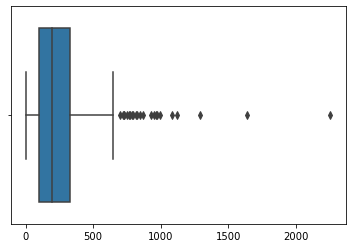

In [13]:
import seaborn as sns
sns.boxplot(data_3_greater_1['rating'].unique())

In [14]:
import numpy as np
data_3_greater_1_log = data_3_greater_1.copy() 
data_3_greater_1_log["rating"] = np.log(data_3_greater_1.rating) 

data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [15]:
max(data_3_greater_1_log.rating),  min(data_3_greater_1_log.rating)

(7.720461694599722, 0.6931471805599453)

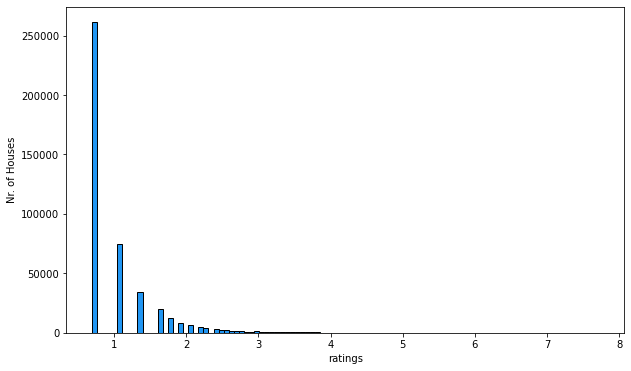

In [16]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1_log['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

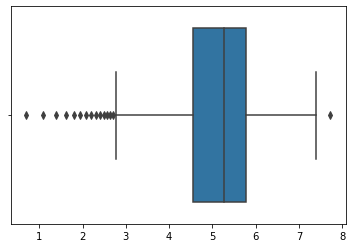

In [17]:
import seaborn as sns
sns.boxplot(data_3_greater_1_log['rating'].unique())

In [18]:
import numpy as np 
Q1 = np.percentile(data_3_greater_1_log['rating'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_3_greater_1_log['rating'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("data_3_greater_1_log has IQR:", IQR) 

data_3_greater_1_log has IQR: 0.6931471805599453


In [212]:
data_raw = pd.read_csv("../datasets/raw_data.csv") 

In [217]:
data_raw.head() 

,Unnamed: 0,optionId,bill
0,0,751839,1
1,1,751782,1
2,2,745321,1
3,3,666652,1
4,4,751873,2


In [244]:
data_raw

,Unnamed: 0,optionId,bill
0,0,751839,1
1,1,751782,1
2,2,745321,1
3,3,666652,1
4,4,751873,2
...,...,...,...
1023028,1023028,764458,326055
1023029,1023029,764905,326056
1023030,1023030,774483,326056
1023031,1023031,752244,326057


In [226]:
transactions = [] 

bill = 1
option_bill = [] 

for index,row in data_raw.iterrows(): 
    if(row.bill == bill):
        option_bill.append(row.optionId)
    else:
        bill = row.bill 
        transactions.append(tuple(set(option_bill))) 
        option_bill.clear()
        option_bill.append(row.optionId)  


transactions[:3]

[(745321, 666652, 751782, 751839),
 (751873, 760125),
 (772494, 754574, 745328, 749358, 745310)]

# Model 1: Matrix Factorization Using Keras 

#### Data Prep for MF 

In [19]:
data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [20]:
data_3_greater_1_log.bill.unique().shape

(448529,)

In [21]:
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [22]:
from ast import literal_eval

data_3_greater_1_log.bill = data_3_greater_1_log.bill.apply(literal_eval) 
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [23]:
type(data_3_greater_1_log.bill.iat[0])

tuple

In [24]:
statement = (772494, 754574, 749358) 
s_set = set(statement) 
tuple(s_set.difference([772494]))

(749358, 754574)

In [25]:
def split_bill(statement):
    return [
        (tuple(set(statement).difference([statement[0]])), statement[0]),
        (tuple(set(statement).difference([statement[1]])), statement[1]),
        (tuple(set(statement).difference([statement[2]])), statement[2])
    ]

In [26]:
data_3_greater_1_log["option_count"] = data_3_greater_1_log.bill.apply(lambda x: len(x))
data_3_greater_1_log.tail() 

,rating,bill,option_count
5211482,0.693147,"(774694, 767718, 767721)",3
5213307,0.693147,"(774590, 774319)",2
5213311,0.693147,"(774469, 774590, 774319)",3
5213576,0.693147,"(764896, 786771, 774571)",3
5215140,0.693147,"(748899, 748868, 752949)",3


In [27]:
sublist_by_2 = data_3_greater_1_log[data_3_greater_1_log.option_count == 2]

In [28]:
sublist_by_2_concat = pd.concat([
    sublist_by_2,
    pd.DataFrame(data_3_greater_1_log[data_3_greater_1_log.option_count == 2].bill.to_list(), columns=["LHS", "RHS"], index=sublist_by_2.index)
], axis=1)
sublist_by_2_concat.head()

,rating,bill,option_count,LHS,RHS
2,2.302585,"(745321, 751839)",2,745321,751839
5,5.017280,"(751782, 751839)",2,751782,751839
10,4.672829,"(751873, 760125)",2,751873,760125
11,2.484907,"(772494, 754574)",2,772494,754574
13,2.397895,"(772494, 749358)",2,772494,749358


In [29]:
sublist_by_3 = data_3_greater_1_log[data_3_greater_1_log.option_count == 3]
sublist_by_3.head() 

,rating,bill,option_count
22,0.693147,"(772494, 754574, 749358)",3
28,0.693147,"(754574, 745328, 745310)",3
44,1.098612,"(751649, 751591, 751532)",3
45,0.693147,"(751649, 751591, 751597)",3
46,0.693147,"(751649, 751595, 751532)",3


In [30]:
replicated_rows = pd.DataFrame(np.repeat(sublist_by_3.values, 3, axis=0), columns=sublist_by_3.columns)

sublists_by_3_reduced = []  
for item in sublist_by_3.bill.to_list():
    sublists_by_3_reduced += split_bill(item) 

sublists_by_3_reduced = pd.DataFrame(sublists_by_3_reduced, columns=["LHS", "RHS"])

sublist_by_3_concat = pd.concat([
    replicated_rows, 
    sublists_by_3_reduced
], axis=1)

sublist_by_3_concat.head() 

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [31]:
dataset_combined_MF = pd.concat([sublist_by_3_concat, sublist_by_2_concat], axis=0, ignore_index=True)
dataset_combined_MF.head()  

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [36]:
dataset_combined_MF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859833 entries, 0 to 859832
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        859833 non-null  object
 1   bill          859833 non-null  object
 2   option_count  859833 non-null  object
 3   LHS           859833 non-null  object
 4   RHS           859833 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 32.8+ MB


In [149]:
sublist_by_2_concat["LHS_C"] = sublist_by_2_concat.LHS.astype('category').cat.codes.values
sublist_by_2_concat["RHS_C"] = sublist_by_2_concat.RHS.astype('category').cat.codes.values

sublist_by_2_concat.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
5,5.017280,"(751782, 751839)",2,751782,751839,3019,3071
10,4.672829,"(751873, 760125)",2,751873,760125,3039,3746
11,2.484907,"(772494, 754574)",2,772494,754574,4308,3518
13,2.397895,"(772494, 749358)",2,772494,749358,4308,2816


### Building MF Model 

In [240]:
from tensorflow import keras
from keras.optimizers import Adam 

n_rhs, n_lhs = len(sublist_by_2_concat.RHS_C.unique()), len(sublist_by_2_concat.LHS_C.unique())
n_latent_factors = 20
# input, embedding --> 
lhs_input = keras.layers.Input(shape=(1,), name="lhs-item") 
lhs_embedding = keras.layers.Embedding(n_lhs + 1, n_latent_factors, name="lhs-embeddings")(lhs_input) 
lhs_vec = keras.layers.Flatten(name="flatten-lhs")(lhs_embedding) 

rhs_input= keras.layers.Input(shape=(1,), name="rhs-item")
rhs_embedding = keras.layers.Embedding(n_rhs + 1, n_latent_factors, name="rhs-embeddings")(rhs_input) 
rhs_vec = keras.layers.Flatten(name="flatten-rhs")(rhs_embedding)

product = keras.layers.dot([lhs_vec, rhs_vec], axes=1, name="dot-product") 

model = keras.Model([lhs_input, rhs_input], product) 


In [242]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary() 

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 rhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 lhs-embeddings (Embedding)     (None, 1, 20)        100860      ['lhs-item[0][0]']               
                                                                                                  
 rhs-embeddings (Embedding)     (None, 1, 20)        101820      ['rhs-item[0][0]']               
                                                                                            

In [243]:
from sklearn.utils import shuffle 
data_shuffled = shuffle(sublist_by_2_concat) 

history = model.fit(
    [sublist_by_2_concat.LHS_C, sublist_by_2_concat.RHS_C], 
    sublist_by_2_concat.rating, 
    epochs=100
    )

Epoch 1/100
7590/7590 [==============================] - 25s 3ms/step - loss: 0.9173 - mae: 0.7103 - mse: 0.9173
Epoch 2/100
7590/7590 [==============================] - 22s 3ms/step - loss: 0.3897 - mae: 0.4550 - mse: 0.3897
Epoch 3/100
7590/7590 [==============================] - 23s 3ms/step - loss: 0.3107 - mae: 0.4063 - mse: 0.3107
Epoch 4/100
7590/7590 [==============================] - 24s 3ms/step - loss: 0.2610 - mae: 0.3732 - mse: 0.2610
Epoch 5/100
7590/7590 [==============================] - 22s 3ms/step - loss: 0.2301 - mae: 0.3514 - mse: 0.2301
Epoch 6/100
7590/7590 [==============================] - 22s 3ms/step - loss: 0.2090 - mae: 0.3356 - mse: 0.2090
Epoch 7/100
7590/7590 [==============================] - 24s 3ms/step - loss: 0.1937 - mae: 0.3232 - mse: 0.1937
Epoch 8/100
7590/7590 [==============================] - 24s 3ms/step - loss: 0.1824 - mae: 0.3139 - mse: 0.1824
Epoch 9/100
7590/7590 [==============================] - 22s 3ms/step - loss: 0.1733 - mae: 0.30

In [257]:
sublist_by_2_concat.rating.max(), sublist_by_2_concat.rating.min() 

(7.720461694599722, 0.6931471805599453)

In [258]:
model.get_layer(name='lhs-embeddings').get_weights()

[array([[-0.20942211,  0.17964152, -0.22562473, ..., -0.23400342,
         -0.18543516, -0.25125247],
        [ 0.02841862,  0.13459192,  0.03790177, ...,  0.20002832,
         -0.14327979, -0.03282325],
        [-0.41530976,  0.4203659 , -0.31914645, ..., -0.07864063,
          0.41820493, -0.15772763],
        ...,
        [-0.1282023 ,  0.14917485,  0.12013394, ...,  0.00111962,
         -0.25943008, -0.3746646 ],
        [-0.12571386, -0.16260399,  0.5803891 , ..., -0.656824  ,
          0.28580412,  0.01063784],
        [ 0.03707497,  0.02086094, -0.0494905 , ...,  0.02872101,
         -0.0133733 , -0.02868872]], dtype=float32)]

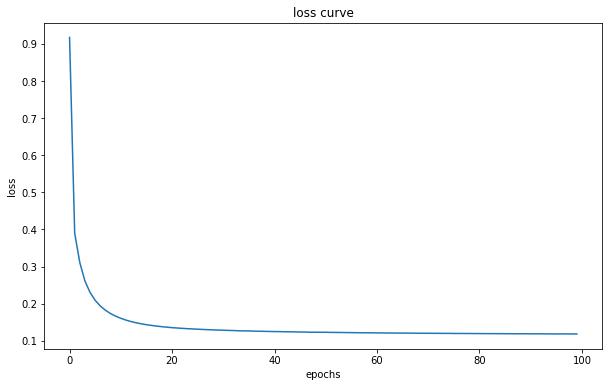

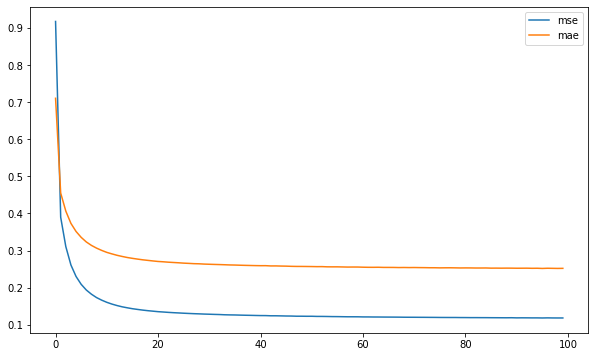

In [260]:
import matplotlib.pyplot as plt 

plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
pd.DataFrame(history.history)["loss"].plot(figsize=(10,6)) 
pd.DataFrame(history.history)[["mse", "mae"]].plot(figsize=(10,6))
plt.show() 

In [261]:
lhs_embddings = model.get_layer(name='lhs-embeddings').get_weights()[0]
lhs_embddings

array([[-0.20942211,  0.17964152, -0.22562473, ..., -0.23400342,
        -0.18543516, -0.25125247],
       [ 0.02841862,  0.13459192,  0.03790177, ...,  0.20002832,
        -0.14327979, -0.03282325],
       [-0.41530976,  0.4203659 , -0.31914645, ..., -0.07864063,
         0.41820493, -0.15772763],
       ...,
       [-0.1282023 ,  0.14917485,  0.12013394, ...,  0.00111962,
        -0.25943008, -0.3746646 ],
       [-0.12571386, -0.16260399,  0.5803891 , ..., -0.656824  ,
         0.28580412,  0.01063784],
       [ 0.03707497,  0.02086094, -0.0494905 , ...,  0.02872101,
        -0.0133733 , -0.02868872]], dtype=float32)

In [262]:
rhs_embddings = model.get_layer(name='rhs-embeddings').get_weights()[0]
rhs_embddings

array([[ 0.19675   ,  0.1866735 , -0.2003656 , ...,  0.14735422,
        -0.24856205, -0.20726104],
       [-0.0379989 ,  0.26103553,  0.02723127, ..., -0.0310324 ,
        -0.33878103,  0.03931811],
       [-0.20876454,  0.18137963, -0.21787699, ..., -0.22313525,
        -0.18592082, -0.25180265],
       ...,
       [-0.32148919, -0.20469247,  0.22150776, ..., -0.28182837,
         0.05838595,  0.20057122],
       [-0.14905392, -0.15806538,  0.31706807, ...,  0.04027366,
         0.620842  ,  0.46800125],
       [ 0.02805981, -0.0466851 , -0.00787505, ...,  0.03328708,
        -0.0140192 , -0.04915602]], dtype=float32)

In [263]:
def recommend(option_in_category, number_of_movies=5):
  options = lhs_embddings[option_in_category]@rhs_embddings.T
  mids = np.argpartition(options, -number_of_movies)[-number_of_movies:]
  
  return mids

In [264]:
recommend(2524)

array([2544, 5011, 4248, 2540, 2559], dtype=int64)

In [265]:
sublist_by_2_concat.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
5,5.017280,"(751782, 751839)",2,751782,751839,3019,3071
10,4.672829,"(751873, 760125)",2,751873,760125,3039,3746
11,2.484907,"(772494, 754574)",2,772494,754574,4308,3518
13,2.397895,"(772494, 749358)",2,772494,749358,4308,2816


In [266]:
sublist_by_2_concat[sublist_by_2_concat.RHS_C == 2100].head()     # RHS = 721495, LHS = 751839

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
776970,0.693147,"(760352, 721495)",2,760352,721495,3719,2100
776972,0.693147,"(760065, 721495)",2,760065,721495,3698,2100
776973,1.791759,"(767779, 721495)",2,767779,721495,4142,2100
776974,0.693147,"(760332, 721495)",2,760332,721495,3715,2100
1168575,2.079442,"(714275, 721495)",2,714275,721495,1741,2100


In [267]:
# RHS = 721495, LHS = 751839 
sublist_by_2_concat.loc[(sublist_by_2_concat.RHS== 721495) & (sublist_by_2_concat.LHS == 751839)]

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C


# Model 2: Apriori (apyori Module)

In [249]:
from apyori import apriori 

In [252]:
associations = apriori(
    transactions,
    min_length = 2,
    max_length=4,
    min_support = 0.001,
    min_confidence = 0.001,
    min_lift = 0.001,
)

associations = list(associations)
len(associations)

958

In [253]:
association = associations[100]
print(association)
print("support", association.support)
print(association.ordered_statistics)
print("right", association.ordered_statistics[0].items_add)
print("left", association.ordered_statistics[0].items_base)
print("confidence", association.ordered_statistics[0].confidence)
print("lift", association.ordered_statistics[0].lift)


RelationRecord(items=frozenset({704335}), support=0.001821772946978433, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({704335}), confidence=0.001821772946978433, lift=1.0)])
support 0.001821772946978433
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({704335}), confidence=0.001821772946978433, lift=1.0)]
right frozenset({704335})
left frozenset()
confidence 0.001821772946978433
lift 1.0


In [254]:
rules = [] 
for association in associations:
    if len(association.ordered_statistics) > 1: 
        rules.append(association)

In [255]:
len(rules)

144

In [256]:
rules 

[RelationRecord(items=frozenset({525099, 525100}), support=0.0011010378585273694, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({525099, 525100}), confidence=0.0011010378585273694, lift=1.0), OrderedStatistic(items_base=frozenset({525099}), items_add=frozenset({525100}), confidence=0.24224021592442646, lift=11.800967554677243), OrderedStatistic(items_base=frozenset({525100}), items_add=frozenset({525099}), confidence=0.05363812938891378, lift=11.800967554677243)]),
 RelationRecord(items=frozenset({702418, 525100}), support=0.0017328311701057487, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({702418, 525100}), confidence=0.0017328311701057487, lift=1.0), OrderedStatistic(items_base=frozenset({525100}), items_add=frozenset({702418}), confidence=0.08441655460929329, lift=11.225336105092875), OrderedStatistic(items_base=frozenset({702418}), items_add=frozenset({525100}), confidence=0.23042414355628058, lift=11.2253361050

# Model 3: Apriori (mlxtend Module)

In [235]:
from efficient_apriori import apriori 

